# Feature Selection Pearson Correlation Coefficien on MLBB Hero Dataset

## Import Library

In [1]:
import math
import cmath
import sys
import traceback
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import t
from sklearn import model_selection

In [2]:
#Read Dataset
data = pd.read_csv("D:\PROPOSAL SKRIPSI\DATASET\MLBB.csv", sep=';')
# data = pd.read_csv("D:\PROPOSAL SKRIPSI\DATASET\depressed.csv")
# data = pd.read_csv("D:\PROPOSAL SKRIPSI\iris.csv")
df = pd.DataFrame(data)
# df.drop('Id', axis = 1, inplace=True)
# df.drop('depressed', axis = 1, inplace=True)
df.drop('Results', axis = 1, inplace=True)
data.style

,defense_overall,offense_overall,skill_effect_overall,difficulty_overall,movement_spd,magic_defense,mana,hp_regen,physical_atk,physical_defense,hp,attack_speed,mana_regen,win_rate,pick_rate,ban_rate,Results
0,7.000000,8.000000,6.000000,6.000000,255.000000,10.000000,430.000000,54.000000,129.000000,19.000000,2728.000000,0.800000,21.000000,47.000000,0.150000,0.020000,fighter
1,6.000000,8.000000,5.000000,5.000000,260.000000,10.000000,0.000000,35.000000,128.000000,25.000000,2738.000000,0.860000,0.000000,45.000000,0.150000,0.020000,fighter
2,8.000000,5.000000,6.000000,4.000000,260.000000,10.000000,430.000000,42.000000,135.000000,21.000000,2819.000000,0.810000,12.000000,47.690000,0.140000,0.020000,tank
3,5.000000,5.000000,9.000000,5.000000,255.000000,10.000000,430.000000,39.000000,126.000000,25.000000,2528.000000,0.910000,16.000000,53.760000,0.080000,0.020000,support
4,5.000000,5.000000,8.000000,7.000000,260.000000,10.000000,438.000000,35.000000,118.000000,17.000000,2540.000000,0.820000,15.000000,51.520000,0.380000,0.030000,marksman
5,7.000000,7.000000,7.000000,6.000000,250.000000,10.000000,0.000000,37.000000,107.000000,22.000000,2758.000000,0.840000,0.000000,47.390000,0.330000,0.030000,fighter
6,6.000000,8.000000,6.000000,6.000000,240.000000,10.000000,0.000000,35.000000,126.000000,21.000000,2738.000000,0.840000,0.000000,50.100000,0.310000,0.030000,fighter
7,7.000000,5.000000,8.000000,7.000000,240.000000,10.000000,540.000000,34.000000,115.000000,15.000000,2521.000000,0.800000,23.000000,49.540000,0.240000,0.030000,mage
8,4.000000,5.000000,9.000000,6.000000,240.000000,10.000000,750.000000,34.000000,110.000000,17.000000,2501.000000,0.800000,23.000000,47.930000,0.230000,0.030000,mage
9,6.000000,7.000000,4.000000,3.000000,260.000000,10.000000,380.000000,37.000000,121.000000,23.000000,2698.000000,0.850000,16.000000,50.540000,0.170000,0.030000,fighter


# Mendefinisikan Konstruktor  dan Fungsi untuk Algoritma Perhitungan

In [3]:
class CorrelationCoefficient:
    r = []
    t = []
    pval = []
    n = len(df)
    threshold = 0.05
    
    def compute_r(self, x, y):
        """ R computation
        :param  list  x: 1st list of random variables
        :param  list  y: 2nd list of random variables
        :return float r: correlation coefficient of X and Y
        """
        if type(x) != list:
            print("Argument(X) is not a list!")
            sys.exit()
        if type(y) != list:
            print("Argument(Y) is not a list!")
            sys.exit()
        if len(x) == 0:
            print("List(X) is none!")
            sys.exit()
        if len(y) == 0:
            print("List(Y) is none!")
            sys.exit()
        if len(x) != len(y):
            print("Argument list size is invalid!")
            sys.exit()
        try:
            mean_x, mean_y  = sum(x) / len(x), sum(y) / len(y)
            cov   = sum([(a - mean_x) * (b - mean_y) for a, b in zip(x, y)])
            var_x = sum([(a - mean_x) ** 2 for a in x])
            var_y = sum([(b - mean_y) ** 2 for b in y])
          
            return (cov / math.sqrt(var_x)) / math.sqrt(var_y)
        except Exception as e:
            raise
            
    def compute_t(self, n, r_coeff):
        try:
            if r_coeff < 1 :
                t = r_coeff * (cmath.sqrt(n - 2)/ cmath.sqrt(1 - r_coeff ** 2))
            else:
                t = 0
            return t
        except Exception as e:
            raise
            
    def r_df_after_compute(self, np_array_r, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_r, index=index_name, columns=col_name)
            
            return df
        except Exception as e:
            raise 
            
    def t_df_after_compute(self, np_array_t, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_t, index=index_name, columns=col_name, dtype="float")
            return df
        except Exception as e:
            raise 
            
    def pval_df_after_compute(self, np_array_pval, index_name, col_name):
        try:
            df = pd.DataFrame(np_array_pval, index=index_name, columns=col_name)
            return df
        except Exception as e:
            raise 
            
    def drop_features(self, dataset, threshold):
        try:
            col_corr = set()
            corr_matrix = dataset
            for i in range(len(df.columns)):
                for j in range (len(df.columns)) :
                      if corr_matrix.iloc[i, j] > threshold and corr_matrix.iloc[i, j] != 1 and corr_matrix.columns[j] not in col_corr : #THRESHOLD CHECK
                          colname = corr_matrix.columns[i]  #NAMA DARI FITUR/ KOLOM
                          col_corr.add(colname)
        
            return col_corr
        except Exception as e:
            raise 
            

# Mendefinisikan Konstruktor  dan Fungsi untuk Klasifikasi

In [4]:
class classifier :
    validation_size = 0.60
    seed = 7       
            
    def model(self, drop_features):
        try:
            new_df = pd.DataFrame(data)
            new_df.drop(drop_features, axis=1, inplace=True)
            # new_df.drop('Id', axis=1, inplace=True)
            # new_df.drop('depressed', axis = 1, inplace=True)
            # new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
            # new_df.dropna(inplace=True)
            new_df.to_csv("D:\PROPOSAL SKRIPSI\DATASET NEW\PCC\MLBBNEW.csv", index=False)
            print(new_df.columns)
            new_df.style
            
            X = new_df.values[:,:-1]
            Y = new_df.values[:,-1:]
            
      
            np.random.seed(classifier.seed)
            
            X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=classifier.validation_size, random_state=classifier.seed)
            
        
            #return (X_train, X_test, Y_train, Y_test)
            return new_df
        except Exception as e:
            raise 
            
            
    def KNN(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.neighbors import KNeighborsClassifier
            model_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p = 3)
            
            
            
            model_KNN.fit(X_train,Y_train.ravel())
            Y_pred = model_KNN.predict(X_test)
            
            print('1) Confusion Matrix for KNN Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_KNN.score(X_train,Y_train)
            accuracy_test = model_KNN.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
           
            
            return (accuracy_train, accuracy_test)
        
        
        
            
        except Exception as e:
            raise 
            
            
    def DecisionTree(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.tree import DecisionTreeClassifier
            model_DT = DecisionTreeClassifier(min_samples_leaf = 3, random_state = classifier.seed)
           
           
            model_DT.fit(X_train,Y_train)
            Y_pred = model_DT.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test.flatten(), Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_DT.score(X_train,Y_train)
            accuracy_test = model_DT.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
           
            return (accuracy_train, accuracy_test)
       
        
        except Exception as e:
            raise 
            
            
    def SupportVectorMachine(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn import svm
            model_SVC = svm.SVC(gamma = 'auto')
            
            
            model_SVC.fit(X_train,Y_train.ravel())
            Y_pred = model_SVC.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_SVC.score(X_train,Y_train)
            accuracy_test = model_SVC.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
            
            return (accuracy_train, accuracy_test)
        
        
        except Exception as e:
            raise 
            
            
    def NaiveBayes(self, X_train, X_test, Y_train, Y_test):
        try:
            from sklearn.naive_bayes import GaussianNB
            model_NB = GaussianNB()
            
            
            model_NB.fit(X_train,Y_train.ravel())
            Y_pred = model_NB.predict(X_test)
            
            print('1) Confusion Matrix for SVC Model:')
            confusion_mat = pd.crosstab(Y_test.flatten(), Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
            from IPython.display import display
            display(confusion_mat)
            
            from sklearn.metrics import classification_report
            cr = classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
            print('2) Classification report:\n',cr)
            
            accuracy_train = model_NB.score(X_train,Y_train)
            accuracy_test = model_NB.score(X_test,Y_test)
            print('3) Accuracy on train and test datasets:', "%.4f and %.4f" % (accuracy_train, accuracy_test))
        
            return (accuracy_train, accuracy_test)
        
        
        except Exception as e:
            raise 

# Main Program

In [5]:
if __name__ == '__main__':
    try:
        for i in range(len(df.columns)):
            x = df.iloc[:, i].tolist()
            col_r = []
            col_t = []
            col_pval = []
            for j in range (len(df.columns)):
                y = df.iloc[:, j].tolist()
                obj = CorrelationCoefficient()
                
                # PERHITUNGAN R, T-TEST, P-VALUE
                r_coeff = obj.compute_r(x, y)
                t_test = obj.compute_t(obj.n, r_coeff)
                p_val = t.sf(np.abs(t_test), obj.n-1)*2 
                
                # MEMASUKKAN PERHITUNGAN KEDALAM LIST
                col_r.append(obj.compute_r(x, y))
                col_t.append(t_test)
                col_pval.append(p_val)
                
            obj.r.append(col_r)
            obj.t.append(col_t)
            obj.pval.append(col_pval)
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)

# MENGUBAH LIST MENJADI NUMPY ARRAY

In [6]:
np_array_r = np.array(obj.r)
np_array_ttest = np.array(obj.t)
np_array_pval = np.array(obj.pval)

# MENGUBAH NUMPY ARRAY MENJADI DATAFRAME

In [7]:

r_df = obj.r_df_after_compute(np_array_r, df.columns, df.columns)
t_df = obj.t_df_after_compute(np_array_ttest, df.columns, df.columns)
pval_df = obj.pval_df_after_compute(np_array_pval, df.columns, df.columns)

        

D:\Anaconda\lib\site-packages\pandas\core\internals\construction.py:195: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype(dtype)


<AxesSubplot:>

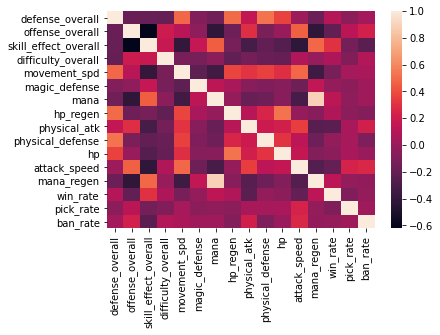

In [8]:
sns.heatmap(r_df, xticklabels=True, yticklabels=True)

<AxesSubplot:>

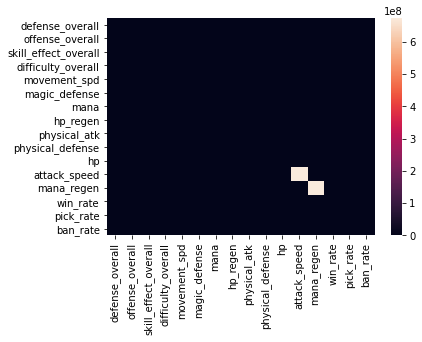

In [9]:
sns.heatmap(t_df, xticklabels=True, yticklabels=True)

<AxesSubplot:>

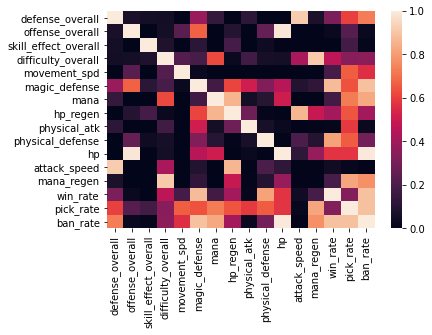

In [10]:
sns.heatmap(pval_df, xticklabels=True, yticklabels=True)

# Drop Fitur

In [11]:
objClassifier = classifier()
drop_features = obj.drop_features(obj.pval_df_after_compute(np_array_pval, df.columns, df.columns), obj.threshold)
print(drop_features)
print(len(drop_features))
model = objClassifier.model(drop_features)
model.head().style

{'hp', 'physical_atk', 'pick_rate', 'magic_defense', 'defense_overall', 'offense_overall', 'difficulty_overall', 'hp_regen', 'skill_effect_overall', 'win_rate', 'mana', 'mana_regen', 'movement_spd', 'physical_defense'}
14
Index(['attack_speed', 'ban_rate', 'Results'], dtype='object')


,attack_speed,ban_rate,Results
0,0.800000,0.020000,fighter
1,0.860000,0.020000,fighter
2,0.810000,0.020000,tank
3,0.910000,0.020000,support
4,0.820000,0.030000,marksman


# Hasil Klasifikasi Untuk Setiap Classifier

## KNN

In [12]:
KNN = objClassifier.KNN(model[0], model[1], model[2], model[3])

KeyError: 0

## Decision Tree 

In [ ]:
DT = objClassifier.DecisionTree(model[0], model[1], model[2], model[3])

## Support Vector Machine 

In [ ]:
SVM = objClassifier.SupportVectorMachine(model[0], model[1], model[2], model[3])

## Naive Bayes

In [ ]:
NB = objClassifier.NaiveBayes(model[0], model[1], model[2], model[3])